*This document presents solutions to tasks 1 and 2.*

We are tasked with completing a data quality assessment on the four datasets that were given by Sprocket Central and finding data insights. The four datasets are listed as followed:

- Transactions data in the past 3 months
- New Customer List 
- Customer Demographic
- Customer Address

We will begin by importing the necessary libraries and loading the datasets.

In [124]:
# Load libraries
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from IPython.display import display
%matplotlib inline

In [125]:
# Set working directory
os.chdir('/Users/saulchirinos/Documents/Data Science/Projects/Forage/KPMG/Data')

In [126]:
# Load data
transactions = pd.read_excel('KPMG data.xlsx', sheet_name='Transactions', header=1, usecols='A:M')
new_cust = pd.read_excel('KPMG data.xlsx', sheet_name='NewCustomerList', header=1, usecols='A:W')
demographic = pd.read_excel('KPMG data.xlsx', sheet_name='CustomerDemographic', header=1, usecols='A:M')
address = pd.read_excel('KPMG data.xlsx', sheet_name='CustomerAddress', header=1, usecols='A:F')

Now that we have all four datasets loaded, we will go through the data quality assessment process for each one starting with transactions.

# Data Quality Assessment

## Transactions data

In [127]:
# Inspect transactions data
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [128]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

We can see that the columns `order_status`, `brand`, `product_line`, `product_class`, and `product_size` are of type `object`. This type of object is very storage intensive and makes our program slow. Therefore, we should convert these to either dummy variables or of type `category` for efficient storage. Additionally, the `product_first_sold_date` should be converted to datetime format.

In [129]:
# Convert object columns to category or dummy variables
LABELS_trans = ['order_status', 'brand', 'product_line', 
                'product_class', 'product_size']

transactions[LABELS_trans] = transactions[LABELS_trans].apply(lambda x: x.astype('category'))

# Convert product_first_sold_date to datetime format
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], 
                                                        unit='D', origin='1900-01-01')

print(transactions.product_first_sold_date.head(), '\n'*3)
print(transactions.info())

0   2012-12-04
1   2014-03-05
2   1999-07-22
3   1998-12-18
4   2015-08-12
Name: product_first_sold_date, dtype: datetime64[ns] 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  category      
 6   brand                    19803 non-null  category      
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price            

This looks better, however we can see that there are some missing values. Let's explore those further.

In [130]:
# Check for missing values
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

There are a couple missing values in almost half of the columns but luckily there aren't that many. We could decide to filter them out completely or impute them. If we drop the rows corresopnding to missing values, the dataset will be minimally affected since we already have 20,000 samples of data.

In [131]:
# Zoom in on missing values
transactions[transactions.online_order.isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-23
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-12
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-07
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-23
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-27


In [132]:
transactions[transactions.brand.isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT


It seems that `brand`, `product_line`, `product_class`, `product_size`, `standard_cost`, and `product_first_sold_date` have the same rows of missing values. This may be to difficult or time consuming to track down all the missing values and impute them. Therefore, we will drop all rows corresopnding to null values.

In [133]:
# Drop missing values
transactions.dropna(inplace=True)

# Check there are no more missing values
transactions.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order               False
order_status               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                 False
standard_cost              False
product_first_sold_date    False
dtype: bool

Let's also check for data entry errors.

In [134]:
transactions.brand.unique()

['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B']
Categories (6, object): ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B']

In [135]:
transactions.product_line.unique()

['Standard', 'Road', 'Mountain', 'Touring']
Categories (4, object): ['Standard', 'Road', 'Mountain', 'Touring']

In [136]:
transactions.product_class.unique()

['medium', 'low', 'high']
Categories (3, object): ['medium', 'low', 'high']

In [137]:
transactions.product_size.unique()

['medium', 'large', 'small']
Categories (3, object): ['medium', 'large', 'small']

In [138]:
# Check for duplicate values
transactions.duplicated().any()

False

There seems to be no data entry errors or duplicate values in this dataset. We will now explore the NewCustomerList dataset.

## New Customer List data

In [139]:
# Explore NewCustomerList dataset
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.45,0.4500,0.562500,0.478125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.6500,0.650000,0.650000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.68,0.8500,0.850000,0.850000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.69,0.6900,0.862500,0.862500,4,4,1.703125


In [140]:
new_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [141]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [142]:
new_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.749970,0.841470,0.945218,0.873141,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.208524,0.251219,0.294832,0.281528,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.630000,0.703125,0.659687,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.760000,0.825000,0.937500,0.858937,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.026250,1.140625,1.073125,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


Firstly, we should drop all unnamed columns since they exhibit any significance unless Sprocket Central can verify and give us the column names. Secondly, we should convert the columns with format `object` to either dummy variables or of type `category` wherever possible in order to improve system efficiency and storage.

In [143]:
# Drop Unnamed columns
for i in range(16, 21):
    new_cust.drop(columns='Unnamed: ' + str(i), inplace=True)

# Convert dtype objects to categorical type 
LABELS_new = ['gender', 'job_industry_category',
            'wealth_segment', 'owns_car']
new_cust[LABELS_new] = new_cust[LABELS_new].apply(lambda x: x.astype('category'))

new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   category      
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    category      
 7   wealth_segment                       1000 non-null   category      
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   category      
 10  tenure       

We also see that there are some missing values. Let's explore these futher.

In [144]:
# Explore missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [145]:
new_cust[new_cust.job_industry_category.isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094


In [146]:
new_cust[new_cust.last_name.isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625


There are missing values in `last_name`, `DOB`, `job_title`, and `job_industry_category`. I am assuming the null values in `last_name` are simply customers without a last name. As for the other three columns, unless our client can provide us with these missing values we can drop all rows with null values except for nulls in `last_name`. We can do this because it will hardly affect our data given we already have 1,000 samples.

In [147]:
# Drop rows with missing values
new_cust.dropna(subset=['DOB', 'job_title', 'job_industry_category'], inplace=True)
new_cust.isnull().any()

first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
Rank                                   False
Value                                  False
dtype: bool

Let's now check for consistency in our data.

In [148]:
new_cust.gender.unique()

['Male', 'Female']
Categories (2, object): ['Male', 'Female']

In [149]:
new_cust.job_title.value_counts()

Cost Accountant              12
Associate Professor          12
Software Consultant          12
Environmental Tech           12
Junior Executive             11
                             ..
Developer II                  1
Staff Accountant I            1
Database Administrator I      1
Developer IV                  1
Database Administrator IV     1
Name: job_title, Length: 178, dtype: int64

In [150]:
new_cust.job_industry_category.value_counts()

Financial Services    187
Manufacturing         175
Health                138
Retail                 73
Property               51
Entertainment          34
IT                     30
Argiculture            24
Telecommunications     23
Name: job_industry_category, dtype: int64

In [151]:
new_cust.wealth_segment.value_counts()

Mass Customer        369
High Net Worth       184
Affluent Customer    182
Name: wealth_segment, dtype: int64

In [152]:
new_cust.deceased_indicator.unique()

array(['N'], dtype=object)

In [153]:
new_cust.owns_car.value_counts()

No     376
Yes    359
Name: owns_car, dtype: int64

In [154]:
new_cust.state.unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [155]:
new_cust.country.unique()

array(['Australia'], dtype=object)

In [156]:
# Check for duplicates
new_cust.duplicated().any()

False

Perhaps we can drop the `deceased_indicator` column, as well as the `country` column because they do not exhibit variation. Additionally, there are no duplicate values in this dataset.

In [157]:
# Drop deceased_indicator and country columns
new_cust.drop(columns=['deceased_indicator', 'country'], inplace=True)
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


We can move forward into exploring the CustomerDemographic dataset.

## Customer Demographic data

In [158]:
# Explore CustomerDemographic dataset
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0


In [159]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

We should try to convert the `object` data types to `categorical` type as well as drop the `default` column. Additionally, we'll inspect `deceased_indicator` for variation.

In [160]:
# Convert type object to type category
LABELS_demo = ['gender', 'job_industry_category', 
            'wealth_segment', 'owns_car']
demographic[LABELS_demo] = demographic[LABELS_demo].apply(lambda x: x.astype('category'))

# Drop default column
demographic.drop(columns='default', inplace=True)

demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   category      
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   category      
 8   wealth_segment                       4000 non-null   category      
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [161]:
# Inspect deceased_indicator column
demographic.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

There are two people in this dataset that are marked as deceased. Let's inspect further to see how we can deal with this.

In [162]:
# Inspect deceased_indicator further
demographic[demographic.deceased_indicator == 'Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
2782,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0
3538,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9.0


Since both these customers have passed away, they are no longer a part of our client's target customers.

In [163]:
# Filter out deceased and drop deceased_indicator column
print(demographic.shape)
demographic = demographic[demographic.deceased_indicator == 'N']
demographic.drop(columns='deceased_indicator', inplace=True)

# Check data again
print(demographic.shape)
print(demographic.info())

(4000, 12)
(3998, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3873 non-null   object        
 3   gender                               3998 non-null   category      
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3911 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3342 non-null   category      
 8   wealth_segment                       3998 non-null   category      
 9   owns_car                             3998 non-null   category  

Now lets check for data consistency and missing values in the data.

In [164]:
# Check for consistency
demographic.gender.unique()

['U', 'Male', 'Female', 'M', 'Femal', 'F']
Categories (6, object): ['U', 'Male', 'Female', 'M', 'Femal', 'F']

In [165]:
demographic.wealth_segment.unique()

['Affluent Customer', 'High Net Worth', 'Mass Customer']
Categories (3, object): ['Affluent Customer', 'High Net Worth', 'Mass Customer']

In [166]:
demographic.owns_car.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

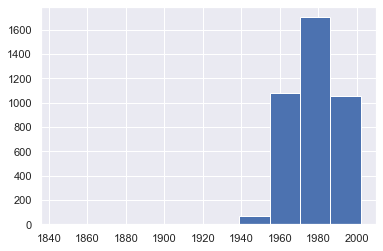

In [167]:
demographic.DOB.hist()
plt.show()

In [168]:
demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,3998.000000,3998.000000,3911.000000
mean,2000.364432,48.871186,10.658655
std,1154.618313,28.709682,5.661042
min,1.000000,0.000000,1.000000
25%,1001.250000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,2999.750000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [169]:
# Check for missing values
demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
tenure                                  87
dtype: int64

There are inconsistent values in `gender` and `DOB`, as well as there are many missing values, especially in `job_title` and `job_industry_category`. Given how we do not have the ability to reach to Sprocket Central, the simplest thing for us to do is to drop the rows with missing values, except for the column for `last_name`. We will also correct the values in the `gender` column and explore the outlier in `DOB` in more detail.

In [170]:
# Correct values in gender column
demographic['gender'].replace('M', 'Male', inplace=True)
demographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demographic['gender'].replace('U', 'Unisex', inplace=True)
print(demographic.gender.unique(), '\n')

# Drop missing values
demographic.dropna(subset=['DOB', 'job_title', 'job_industry_category', 'tenure'], inplace=True)
print(demographic.isnull().any())

['Unisex', 'Male', 'Female']
Categories (3, object): ['Unisex', 'Male', 'Female'] 

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
owns_car                               False
tenure                                 False
dtype: bool


In [171]:
# Inspect outlier in DOB column
demographic[demographic.DOB <= '1920-01-01']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,34,Jephthah,Bachmann,Unisex,59,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0


There is only one outlier who's DOB is in the 1800's. Let's fixed this by changing it to "1943-12-21".

In [172]:
# Fix outlier
demographic.set_index('customer_id', inplace=True)
demographic.loc[34, 'DOB'] = pd.Timestamp('1943-12-21')
demographic.reset_index(inplace=True)

# Check
demographic[demographic.customer_id == 34]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,34,Jephthah,Bachmann,Unisex,59,1943-12-21,Legal Assistant,IT,Affluent Customer,No,20.0


The CustomerDemographics data looks good, now let's review the last dataset, CustomerAddress.

## Customer Address data

In [173]:
# Explore CustomerAddress data
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [174]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


Looks like we don't have any missing values in this dataset! Let's explore the `state` and `country` columns further to make sure there are no data entry errors.

In [175]:
# Inspect state and country columns
address.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [176]:
address.country.unique()

array(['Australia'], dtype=object)

We can see that there are duplicates of "New South Wales" with "NSW" and "Victoria" with "VIC". Let's abbreviate these states and convert to `category` type. As for the `country` column, since we only have values for Australia we can drop this column entirely.

In [177]:
# Match state names
address['state'] = address.state.str.replace('New South Wales', 'NSW')
address['state'] = address.state.str.replace('Victoria', 'VIC')

# Convert to category type
address['state'] = address.state.astype('category')
assert address.state.dtype == 'category'

# Drop country column
address.drop(columns='country', inplace=True)

# Check operations were done correctly
print(address.state.unique(), '\n')
print(address.info())

['NSW', 'QLD', 'VIC']
Categories (3, object): ['NSW', 'QLD', 'VIC'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3999 non-null   int64   
 1   address             3999 non-null   object  
 2   postcode            3999 non-null   int64   
 3   state               3999 non-null   category
 4   property_valuation  3999 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 129.1+ KB
None


Looks great so far. Now let's check for duplicates.

In [178]:
address.duplicated().any()

False

No duplicates! We are now finished with the data quality assessment process on all four datasets.

Now that all four datasets have been cleaned, let's merge the transactions data with the customer demographics data and the customer address data and see if we need to do some final clean-ups of the data. We can then begin the EDA process to find valuable insights.

In [179]:
# Merge datasets
data = pd.merge(transactions, demographic, on='customer_id', how='left')
data = pd.merge(data, address, on='customer_id', how='left')

print(data.shape)
print(data.columns)

(19445, 27)
Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'property_valuation'],
      dtype='object')


Let's check for duplicates and null values.

In [180]:
# Check for duplicates
data.duplicated().any()

False

In [181]:
# Check for missing values
data.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
first_name                             5379
last_name                              5805
gender                                 5379
past_3_years_bike_related_purchases    5379
DOB                                    5379
job_title                              5379
job_industry_category                  5379
wealth_segment                         5379
owns_car                               5379
tenure                          

There are quite a few missing values, let's explore these further and see if we can impute them.

In [182]:
data[data.first_name.isnull()][['customer_id', 'first_name', 'last_name', 
                                'gender', 'DOB', 'job_title']].head()

,customer_id,first_name,last_name,gender,DOB,job_title
4,787,NaN,NaN,NaN,NaT,NaN
10,1986,NaN,NaN,NaN,NaT,NaN
16,2426,NaN,NaN,NaN,NaT,NaN
24,2822,NaN,NaN,NaN,NaT,NaN
25,2596,NaN,NaN,NaN,NaT,NaN


In [183]:
data[data.first_name.isnull()][['customer_id', 'first_name', 'last_name', 
                                'gender', 'DOB', 'job_title']].tail()

,customer_id,first_name,last_name,gender,DOB,job_title
19433,714,NaN,NaN,NaN,NaT,NaN
19436,1374,NaN,NaN,NaN,NaT,NaN
19437,5,NaN,NaN,NaN,NaT,NaN
19438,2618,NaN,NaN,NaN,NaT,NaN
19443,2764,NaN,NaN,NaN,NaT,NaN


In [184]:
data.customer_id.value_counts()

1068    14
2183    14
2476    14
637     13
3232    13
        ..
71       1
2532     1
1846     1
1632     1
2047     1
Name: customer_id, Length: 3492, dtype: int64

It seems that when we had merged all three datasets together, there were some customers who's activity was not tracked all the way through. Consequently, we are left with no other choice but to drop all missing values and move forward.

In [185]:
# Drop missing values
print(data.shape)
data.dropna(inplace=True)
print(data.shape)

(19445, 27)
(13628, 27)


# Exploratory Data Analysis

In [186]:
# Explore data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13628 non-null  int64         
 1   product_id                           13628 non-null  int64         
 2   customer_id                          13628 non-null  int64         
 3   transaction_date                     13628 non-null  datetime64[ns]
 4   online_order                         13628 non-null  float64       
 5   order_status                         13628 non-null  category      
 6   brand                                13628 non-null  category      
 7   product_line                         13628 non-null  category      
 8   product_class                        13628 non-null  category      
 9   product_size                         13628 non-null  category      
 10  list_price

Now that we have our data in order, let's explore the customers and their activities.

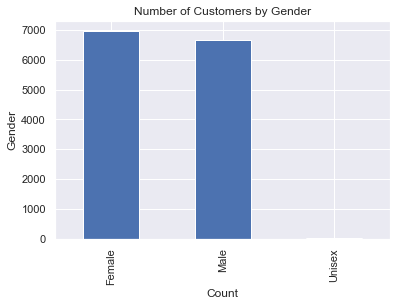

In [187]:
# Set graph style
sns.set()

# Plot gender count plot
data.gender.value_counts().plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Number of Customers by Gender')
plt.show()

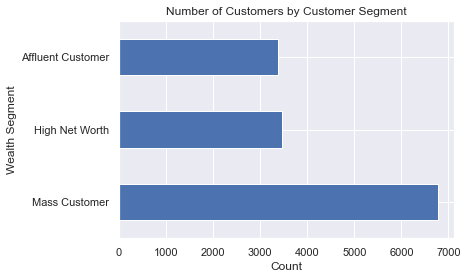

In [188]:
# Plot wealth segment count plot
data.wealth_segment.value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Wealth Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

We can see that most of Sprocket Central's customers are split into males and females with a very small proportion being unisex. Furthermore, about 50% of customers are mass customers, the rest are split between affluent and high net worth. Before we analyze the product attributes, let's find which age group is responsible for the most transactions.

In [189]:
# datetime library
import datetime as dt

# Function to get age
def dob_to_age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [190]:
# Get ages
data['age'] =  data.DOB.apply(lambda x: dob_to_age(x))

# Split customers into age groups
data['age_dec'] = (data.age // 10) * 10

data.age_dec.head()

0    60
1    40
2    40
3    50
5    60
Name: age_dec, dtype: int64

In [191]:
data.age_dec.value_counts()

40    4821
50    2391
30    2296
20    2287
60    1722
10      76
70      20
80      15
Name: age_dec, dtype: int64

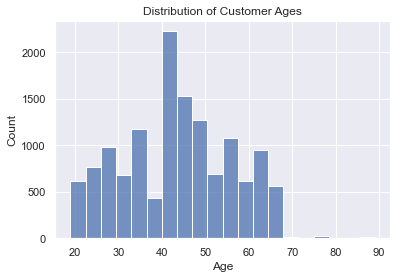

In [192]:
# Plot distribution of ages
sns.histplot(x='age', data=data, bins=20)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.show()

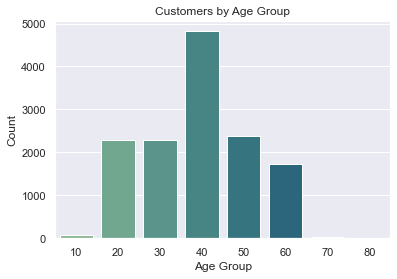

In [193]:
# Plot age groups
sns.countplot(x='age_dec', data=data, palette='crest')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Customers by Age Group')
plt.show()

It looks like the majority of the customers are in their 40's. The rest are approximately evenely split, besides customers in their 60's and teens. Now let's explore customer activity by the product attributes.

In [194]:
data.brand.unique()

['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B']
Categories (6, object): ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B']

There are 6 brands of bicycles these customers purchase, let's see which on is baught most frequently by gender, wealth segment, and whether or not they own a car.

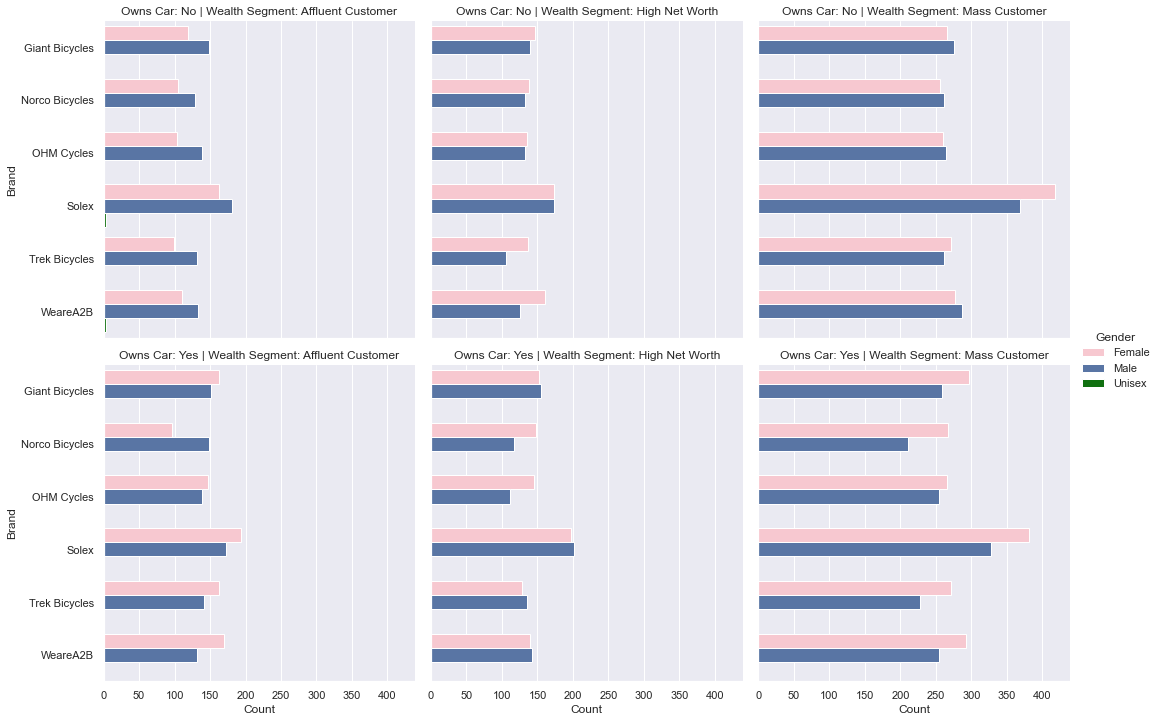

In [195]:
# Color mapping
pal = {'Male': 'b', 'Female': 'pink', 'Unisex': 'green'}

# Plot chart of brands
g = sns.catplot(y='brand', hue='gender', palette=pal, row='owns_car',
                col='wealth_segment', data=data, kind='count')

g.set_axis_labels('Count', 'Brand')
g.set_titles('Owns Car: {row_name} | Wealth Segment: {col_name}')
g.legend.set_title('Gender')
plt.show()

From the count plot shown above, we can see that the brand Solex has the most purchases for each wealth segment, not accounting for gender. If we account for gender, we find mostly females and males in the mass customer segment purchase the most products, Solex being the highest. Additionally, it seems as if owning a car does not play a huge role in purchases because transaction counts mostly stay consistent across the board. Another obvious note is that the unisex gender is extremely small relative to the female and male genders. Unisex can be found in the affluent customer segment reported without a car buying the brands Solex and WearaA2B. Let's explore the product line column with gender and wealth segment.

In [196]:
data.product_line.unique()

['Standard', 'Road', 'Mountain', 'Touring']
Categories (4, object): ['Standard', 'Road', 'Mountain', 'Touring']

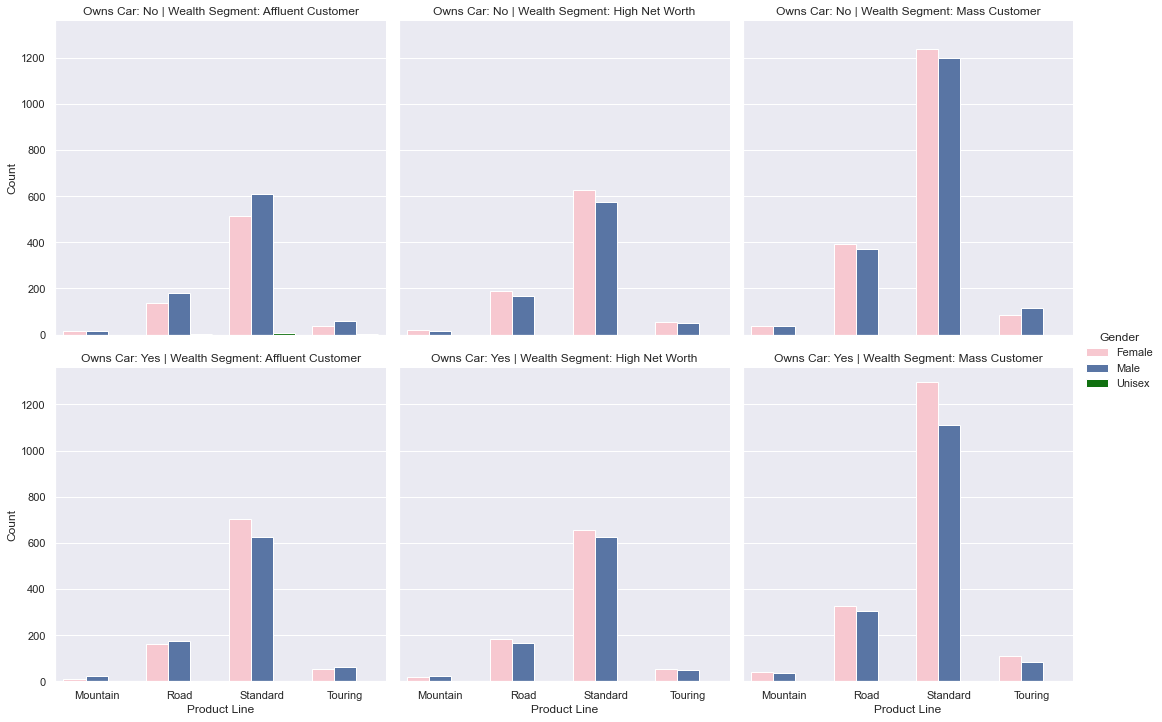

In [197]:
# Plot
g = sns.catplot(x='product_line', hue='gender', palette=pal, row='owns_car', 
                col='wealth_segment', data=data, kind='count')

g.set_axis_labels('Product Line', 'Count')
g.set_titles('Owns Car: {row_name} | Wealth Segment: {col_name}')
g.legend.set_title('Gender')
plt.show()

We can see from the chart generated that the mass customer segment is again the most segment to buy bicycles, specifically standards. Among the mass customer segement, females tend to purchase more then males regardless of whether or not they own a car when it comes to standard and even road bicycles. Let's do the same for the product class and product size columns.

In [198]:
# Product class
data.product_class.unique()

['medium', 'low', 'high']
Categories (3, object): ['medium', 'low', 'high']

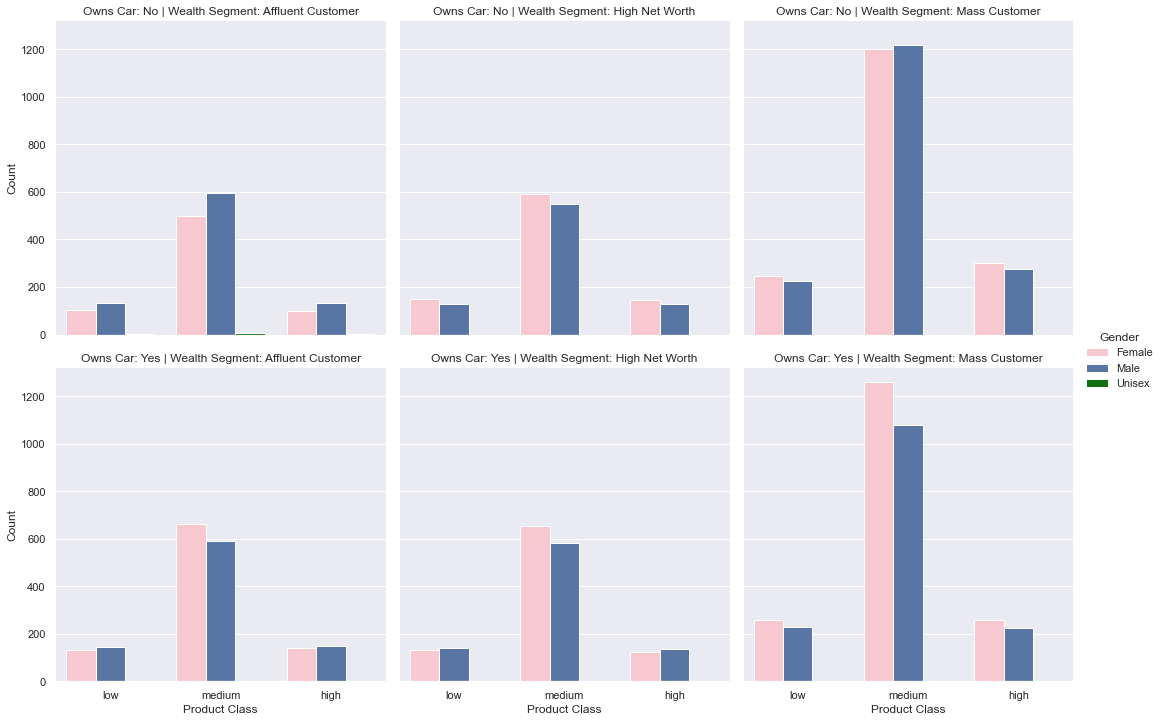

In [199]:
# Plot product class by gender and wealth segment
g = sns.catplot(x='product_class', hue='gender', palette=pal, row='owns_car', 
                col='wealth_segment', order=['low', 'medium', 'high'], 
                data=data, kind='count')

g.set_axis_labels('Product Class', 'Count')
g.set_titles('Owns Car: {row_name} | Wealth Segment: {col_name}')
g.legend.set_title('Gender')
plt.show()

In [200]:
# Product size
data.product_size.unique()

['medium', 'large', 'small']
Categories (3, object): ['medium', 'large', 'small']

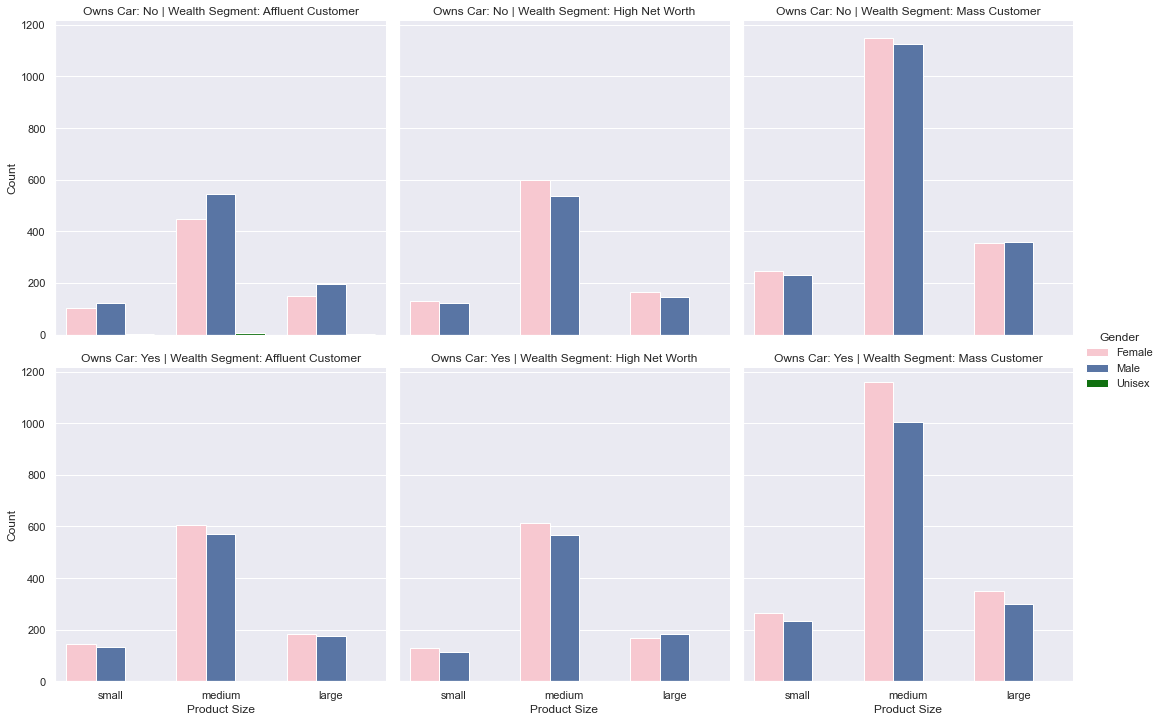

In [201]:
# Plot product size by gender and wealth segment
g = sns.catplot(x='product_size', hue='gender', row='owns_car', col='wealth_segment', 
                palette=pal, order=['small', 'medium', 'large'], data=data, kind='count')

g.set_axis_labels('Product Size', 'Count')
g.set_titles('Owns Car: {row_name} | Wealth Segment: {col_name}')
g.legend.set_title('Gender')
plt.show()

We can see that still the vast majority of customers come from the mass customer segment. Owning a car does not seem to affect the results in either chart, but we will have to explore that in further detail. Let's see the distribution in job industry.

In [202]:
# Group by industry
job_cat = data.groupby('job_industry_category').agg(n_customers=('customer_id', 'count'))
job_cat.sort_values('n_customers', ascending=False)

,n_customers
job_industry_category,
Manufacturing,3322
Financial Services,3228
Health,2645
Retail,1411
Property,1087
Entertainment,586
IT,582
Argiculture,482
Telecommunications,285


Looks like most customers are in manufacturing, financial services, and health industry. Let's plot a bar chart to get a better visual.

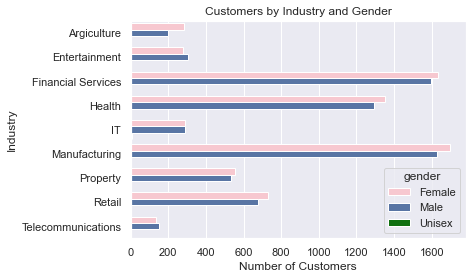

In [203]:
sns.countplot(y='job_industry_category', hue='gender', palette=pal, data=data)
plt.xlabel('Number of Customers')
plt.ylabel('Industry')
plt.title('Customers by Industry and Gender')
plt.show()

Looks great! Now coming back to customers owning a car, do most of these customers own a car? Let's plot a visual by gender to find out. 

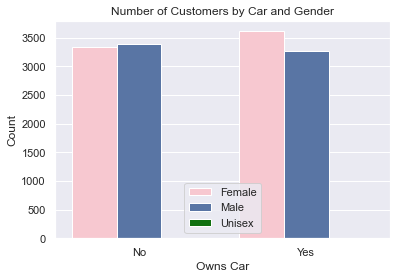

In [204]:
# Plot graph
sns.countplot(x='owns_car', hue='gender', palette=pal, data=data)
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.title('Number of Customers by Car and Gender')
plt.legend(loc=8)
plt.show()

We can see that the distribution of customers who own a car and those who do not are approximately even. Let's now see the distribution of customers who have made a bike purchase in the past three years. Intuitevely, customers that have made frequent bike purchases will tend to be the target market.

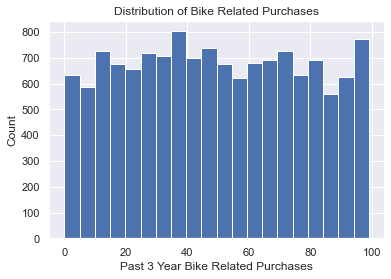

In [205]:
data.past_3_years_bike_related_purchases.hist(bins=20)
plt.xlabel('Past 3 Year Bike Related Purchases')
plt.ylabel('Count')
plt.title('Distribution of Bike Related Purchases')
plt.show()

It looks pretty even all throughout the board! Let's have a look at the distribution of experience (tenure).

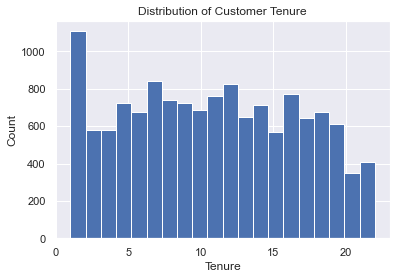

In [206]:
data.tenure.hist(bins=20)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')
plt.show()

Almost the same as past related purchases, except there are a few more customers with less than 3 years of experience it seems like. Can we find any valuable insights by customer demographics?

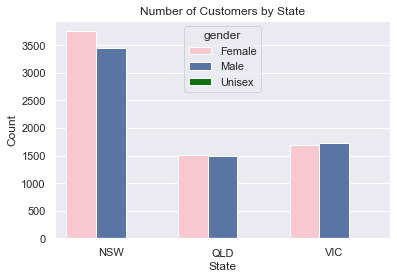

In [207]:
sns.countplot(x='state', hue='gender', palette=pal, data=data)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Customers by State')
plt.show()

Looka like most customers, both male and female, are located in New South Wales! Perhaps postal codes can help us identify a more specific location.

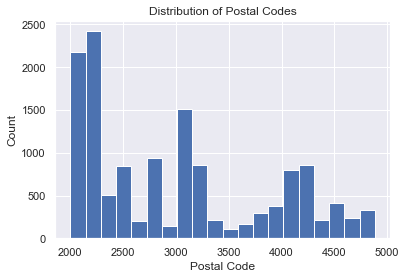

In [208]:
data.postcode.hist(bins=20)
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Distribution of Postal Codes')
plt.show()

Seems as if mosts customers have a postal code around 2000-2250, as well as 3000-3100 approximately. 

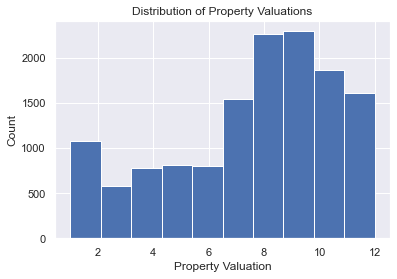

In [209]:
data.property_valuation.hist()
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.title('Distribution of Property Valuations')
plt.show()

In [210]:
new_cust.head() # just for table reference

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


# Model Development

We will be analyzing customer segements based on their recency, frequency, and monetary value. This analysis is called RFM analysis, and it helps us determine which cluster segements are most valueable to Sprocket Central.

In [211]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,age_dec
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064.0,VIC,6.0,66,60
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196.0,NSW,5.0,42,40
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,No,22.0,586 Miller Parkway,2835.0,NSW,1.0,44,40
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,No,16.0,1617 Harper Parkway,2096.0,NSW,10.0,59,50
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Property,Affluent Customer,Yes,16.0,7174 Thackeray Point,2153.0,NSW,10.0,62,60


In [212]:
# Create new dataframe to store RFM results
rfm = pd.DataFrame(data.customer_id.unique(), columns=['customer_id'])
rfm.head()

,customer_id
0,2950
1,3120
2,402
3,3135
4,2339


## Recency

In [213]:
# Obtain the most recent purchase date for each customer and create a dataframe with it
recent_purchase = data.groupby('customer_id').transaction_date.max().reset_index()
recent_purchase.columns = ['customer_id', 'recent_purchase_date']
recent_purchase

,customer_id,recent_purchase_date
0,1,2017-12-23
1,2,2017-08-24
2,9,2017-10-13
3,12,2017-10-24
4,13,2017-12-03
...,...,...
2441,3493,2017-09-28
2442,3494,2017-12-26
2443,3495,2017-12-17
2444,3496,2017-04-18


In [214]:
# Calculate recency 
recent_purchase['recency'] = (recent_purchase.recent_purchase_date.max() - 
                            recent_purchase.recent_purchase_date).dt.days
recent_purchase.head()

,customer_id,recent_purchase_date,recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,9,2017-10-13,78
3,12,2017-10-24,67
4,13,2017-12-03,27


In [215]:
rfm = pd.merge(rfm, recent_purchase[['customer_id', 'recency']], on='customer_id')

In [216]:
display(rfm.head())
display(rfm.recency.describe())

,customer_id,recency
0,2950,75
1,3120,20
2,402,56
3,3135,121
4,2339,11


count    2446.000000
mean       62.432543
std        59.659272
min         0.000000
25%        18.000000
50%        44.500000
75%        87.000000
max       353.000000
Name: recency, dtype: float64

We can see that the average recency is 62 and the median is 45. Let's plot a histof

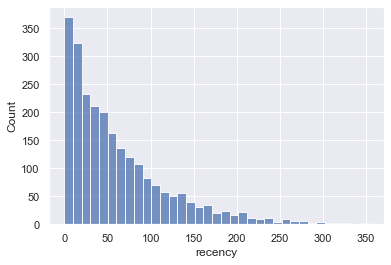

In [217]:
sns.histplot(x='recency', data=rfm)
plt.show()

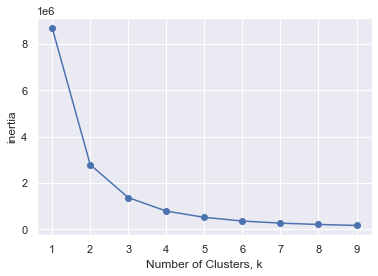

In [218]:
# Find optimal number of clusters
from sklearn.cluster import KMeans
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm[['recency']])
    inertias.append(kmeans.inertia_)

def plot_elbow(values):
    """Line plot of the number of clusters and its inertia value"""
    plt.plot(range(1, 10), values, '-o')
    plt.xlabel('Number of Clusters, k')
    plt.ylabel('inertia')
    plt.show()

plot_elbow(inertias)

From the cluster graph above, we can see that the optimal number of clusters is 4.

In [219]:
# Apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['recency']])
rfm['recency_cluster'] = kmeans.predict(rfm[['recency']])

def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

rfm = order_cluster('recency_cluster', 'recency', rfm, True)

In [220]:
rfm.head()

,customer_id,recency,recency_cluster
0,2950,75,1
1,402,56,1
2,2459,53,1
3,2783,73,1
4,1243,70,1


In [221]:
rfm.groupby('recency_cluster').recency.describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,1177.0,18.515718,12.223749,0.0,8.0,17.0,28.0,42.0
1,770.0,66.633766,16.295337,43.0,52.0,64.0,80.0,99.0
2,363.0,133.093664,22.301476,100.0,113.0,131.0,149.0,181.0
3,136.0,230.117647,40.565824,182.0,198.0,218.0,256.0,353.0


## Frequency

In [222]:
# Obtain order counts for each customer and create a dataframe with it
frequency = data.groupby('customer_id').transaction_date.count().reset_index()
frequency.columns = ['customer_id', 'frequency']
frequency.head()

,customer_id,frequency
0,1,11
1,2,3
2,9,6
3,12,7
4,13,7


In [223]:
# Add frequency to rfm dataframe
rfm = pd.merge(rfm, frequency, on='customer_id')
rfm.head()

,customer_id,recency,recency_cluster,frequency
0,2950,75,1,3
1,402,56,1,6
2,2459,53,1,11
3,2783,73,1,11
4,1243,70,1,10


In [224]:
rfm.frequency.describe()

count    2446.000000
mean        5.571545
std         2.273433
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: frequency, dtype: float64

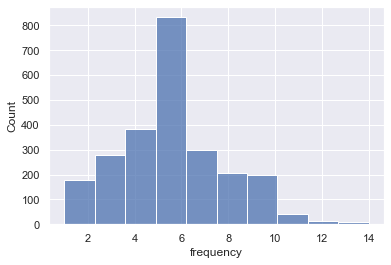

In [225]:
sns.histplot(x='frequency', data=rfm, bins=10)
plt.show()

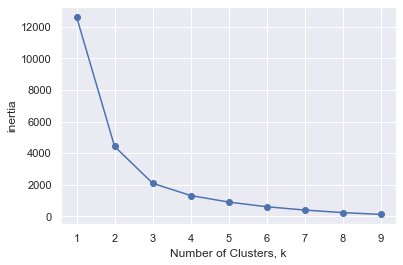

In [226]:
# Find optimal number of clusters
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm[['frequency']])
    inertias.append(kmeans.inertia_)

plot_elbow(inertias)

We see again that judging from the graph, the optimal number of clusters is 4.

In [227]:
# Apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['frequency']])
rfm['frequency_cluster'] = kmeans.predict(rfm[['frequency']])

rfm = order_cluster('frequency_cluster', 'frequency', rfm, False)

rfm.head()

,customer_id,recency,recency_cluster,frequency,frequency_cluster
0,2950,75,1,3,3
1,1031,46,1,3,3
2,1612,67,1,2,3
3,455,67,1,3,3
4,678,94,1,3,3


In [228]:
rfm.groupby('frequency_cluster').frequency.describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,263.0,9.863118,1.120714,9.0,9.0,9.0,10.5,14.0
1,924.0,6.774892,0.790777,6.0,6.0,7.0,7.0,8.0
2,800.0,4.521250,0.499861,4.0,4.0,5.0,5.0,5.0
3,459.0,2.520697,0.651758,1.0,2.0,3.0,3.0,3.0


## Monetary

In [229]:
# Compute profit for each customer
data['profit'] = data.list_price - data.standard_cost
data[['list_price', 'standard_cost', 'profit']].head()

,list_price,standard_cost,profit
0,71.49,53.62,17.87
1,2091.47,388.92,1702.55
2,1793.43,248.82,1544.61
3,1198.46,381.10,817.36
5,1538.99,829.65,709.34


In [230]:
monetary = data.groupby('customer_id').profit.sum().reset_index()
monetary.head()

,customer_id,profit
0,1,3018.09
1,2,2226.26
2,9,2353.11
3,12,3540.03
4,13,4337.38


In [231]:
# Add monetary to rfm dataframe
rfm = pd.merge(rfm, monetary, on='customer_id')
rfm.columns = ['customer_id', 'recency', 'recency_cluster', 
            'frequency', 'frequency_cluster', 'monetary']
rfm.head()

,customer_id,recency,recency_cluster,frequency,frequency_cluster,monetary
0,2950,75,1,3,3,645.99
1,1031,46,1,3,3,1463.88
2,1612,67,1,2,3,2932.82
3,455,67,1,3,3,1600.90
4,678,94,1,3,3,1606.99


In [232]:
rfm.monetary.describe()

count     2446.000000
mean      3075.535699
std       1768.178040
min         15.080000
25%       1796.072500
50%       2795.780000
75%       4095.417500
max      11668.950000
Name: monetary, dtype: float64

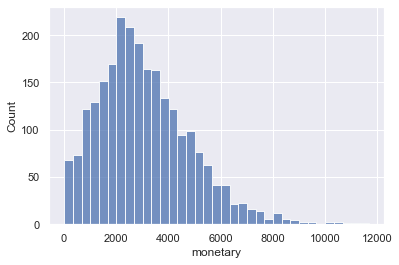

In [233]:
# Plot distribution
sns.histplot(x='monetary', data=rfm)
plt.show()

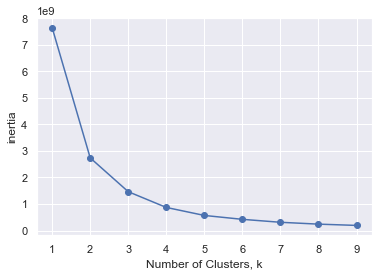

In [234]:
# Find optimal number of clusters
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm[['monetary']])
    inertias.append(kmeans.inertia_)
plot_elbow(inertias)

Again, we see consistent results telling us that the optimal number of clusters is 4.

In [235]:
# Apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['monetary']])
rfm['monetary_cluster'] = kmeans.predict(rfm[['monetary']])

rfm = order_cluster('monetary_cluster', 'monetary', rfm, False)

rfm.head()

,customer_id,recency,recency_cluster,frequency,frequency_cluster,monetary,monetary_cluster
0,2950,75,1,3,3,645.99,3
1,1031,46,1,3,3,1463.88,3
2,455,67,1,3,3,1600.90,3
3,678,94,1,3,3,1606.99,3
4,3466,68,1,3,3,272.79,3


In [236]:
rfm.groupby('monetary_cluster').monetary.describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,186.0,6992.742688,1156.265127,5779.65,6148.6225,6649.37,7495.5775,11668.95
1,603.0,4548.871973,579.186509,3666.94,4047.0650,4515.25,5005.7500,5763.13
2,953.0,2778.437492,479.187884,1980.71,2355.7600,2739.50,3186.6300,3660.95
3,704.0,1180.808878,535.781620,15.08,787.7450,1255.53,1645.4700,1970.78


## Overall Score

In [237]:
rfm['overall_score'] = rfm.recency_cluster + rfm.frequency_cluster + rfm.monetary_cluster
rfm.groupby('overall_score')[['recency', 'frequency', 'monetary']].mean()

,recency,frequency,monetary
overall_score,,,
0,16.885057,10.241379,7086.173333
1,21.813433,8.910448,5782.874104
2,27.778947,7.617544,4615.263930
3,38.302817,6.612676,3708.149977
4,46.501075,5.595699,2937.133054
5,61.450425,4.801700,2337.346317
6,73.163077,3.756923,1801.308062
7,113.384181,3.265537,1444.233220
8,154.560345,2.586207,1186.460086


The scoring above tells us that the target customers are scored with a 3 or below and the worst customers are scored with a 7 or higher.

- 0 - 3: High Value
- 4 - 6: Mid Value
- 7+: Low Value

In [238]:
rfm['segment'] = 'High Value'
rfm.loc[rfm.overall_score > 3, 'segment'] = 'Mid Value'
rfm.loc[rfm.overall_score > 6, 'segment'] = 'Low Value'

In [239]:
rfm.shape

(2446, 9)

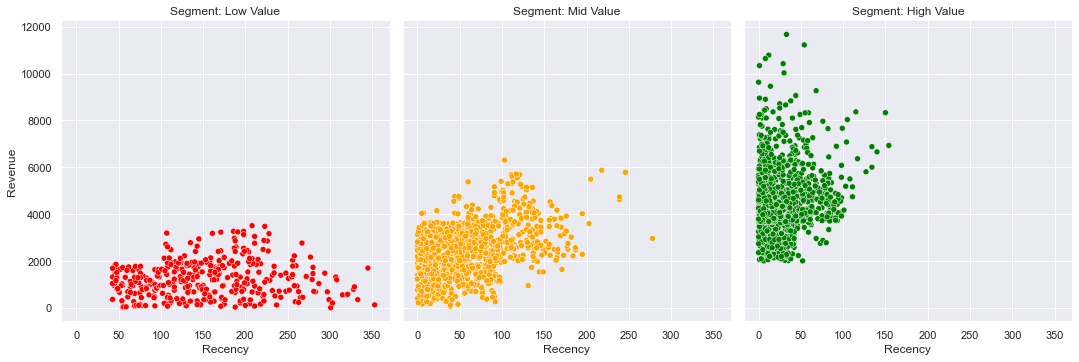

In [240]:
g = sns.relplot(x='recency', y='monetary', hue='segment', 
                palette=['red', 'orange', 'green'], col='segment', 
                data=rfm)

g.set_axis_labels('Recency', 'Revenue')
g.set_titles('Segment: {col_name}')
g.legend.remove()
plt.show()

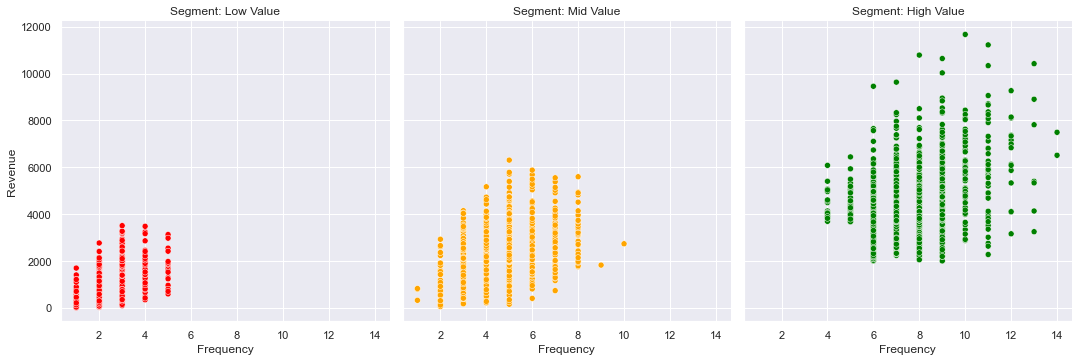

In [241]:
g = sns.relplot(x='frequency', y='monetary', hue='segment', 
                palette=['red', 'orange', 'green'], col='segment', 
                data=rfm)

g.set_axis_labels('Frequency', 'Revenue')
g.set_titles('Segment: {col_name}')
g.legend.remove()
plt.show()

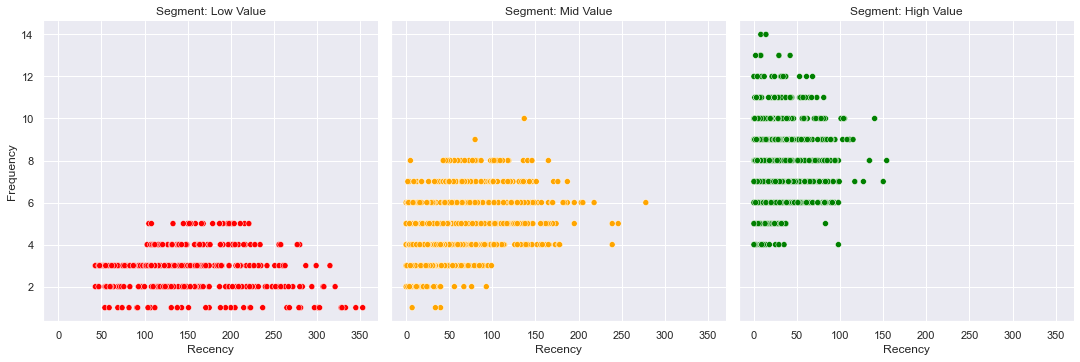

In [242]:
g = sns.relplot(x='recency', y='frequency', hue='segment', 
                palette=['red', 'orange', 'green'], col='segment', 
                data=rfm)

g.set_axis_labels('Recency', 'Frequency')
g.set_titles('Segment: {col_name}')
g.legend.remove()
plt.show()

That concludes our RFM analysis! We have found which customers give significant value to Sprocket Central by finding how recent they have made a purchase, how frequent they purchase, and how much they spend.

In [244]:
# Save datasets to csv
# writer = pd.ExcelWriter('KPMG_task2.xlsx')

# data.to_excel(writer, sheet_name='Data', index=False)
# rfm.to_excel(writer, sheet_name='RFM', index=False)

# writer.save()